In [1]:
import pandas as pd
df=pd.read_csv('d:/data/university/data.csv')
df.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,class
0,7,9,1,1,1,1,5,100.00,1
1,9,17,3,12,4,4,1,91.67,1
2,17,11,5,4,2,2,15,89.50,1
3,10,24,4,16,16,11,50,86.17,1
4,2,29,7,37,22,22,18,85.21,1


In [2]:
train_cols=df.columns[0:8]
X=df[train_cols] #독립변수
y=df['class'] #종속변수
df.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,class
0,7,9,1,1,1,1,5,100.00,1
1,9,17,3,12,4,4,1,91.67,1
2,17,11,5,4,2,2,15,89.50,1
3,10,24,4,16,16,11,50,86.17,1
4,2,29,7,37,22,22,18,85.21,1


In [3]:
#로지스틱 회귀분석
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2()) #요약정보
#모형의 설명력: 65.4%
#유의하지 않은 변수들
#

Optimization terminated successfully.
         Current function value: 0.188005
         Iterations 9
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.654   
Dependent Variable:    class             AIC:               843.2218
Date:                  2020-03-17 14:16  BIC:               888.7915
No. Observations:      2200              Log-Likelihood:    -413.61 
Df Model:              7                 LL-Null:           -1196.0 
Df Residuals:          2192              LLR p-value:       0.0000  
Converged:             1.0000            Scale:             1.0000  
No. Iterations:        9.0000                                       
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
quality_of_education -0.0004   0.0010 -0.3846 0.7005 -0.0023  0.0016
alumni_employment    -0.0020

In [4]:
df.columns

Index(['quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'class'],
      dtype='object')

In [5]:
# quality_of_education 제거
X=df[['alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'class']]
y=df['class'] #종속변수

model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

         Current function value: 0.000000
         Iterations: 35
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   1.000      
Dependent Variable:     class              AIC:                16.0000    
Date:                   2020-03-17 14:16   BIC:                61.5697    
No. Observations:       2200               Log-Likelihood:     -5.5556e-06
Df Model:               7                  LL-Null:            -1196.0    
Df Residuals:           2192               LLR p-value:        0.0000     
Converged:              0.0000             Scale:              1.0000     
No. Iterations:         35.0000                                           
--------------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------
alumni_employment  -0.0146    7.1292 -0.0021 0.9984    -13.9877 

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [6]:
# quality_of_education, 제거
X=df[['alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents', 'score', 'class']]
y=df['class'] #종속변수

model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

         Current function value: 0.000000
         Iterations: 35
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   1.000      
Dependent Variable:     class              AIC:                16.0000    
Date:                   2020-03-17 14:16   BIC:                61.5697    
No. Observations:       2200               Log-Likelihood:     -5.5556e-06
Df Model:               7                  LL-Null:            -1196.0    
Df Residuals:           2192               LLR p-value:        0.0000     
Converged:              0.0000             Scale:              1.0000     
No. Iterations:         35.0000                                           
--------------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------
alumni_employment  -0.0146    7.1292 -0.0021 0.9984    -13.9877 

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
#최종적으로 선택한 독립변수
train_cols=[]

In [20]:
#샘플링 작업(0,1)
df['class'].value_counts()

0    1686
1     514
Name: class, dtype: int64

In [21]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['class'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

ValueError: at least one array or dtype is required

In [10]:
df_samp['class'].value_counts() #샘플링 후의 0,1 분포

1    514
0    514
Name: class, dtype: int64

In [11]:
#샘플링 데이터셋에서 X,y 선택
X=X_samp[train_cols]
y=y_samp['class']

In [17]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [18]:
#로지스틱 회귀분석 모형
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(random_state=10, max_iter=5000)
logit.fit(X_train,y_train)

ValueError: at least one array or dtype is required

In [ ]:
#모형의 예측 정확도
print(logit.score(X_train,y_train))
print(logit.score(X_test,y_test))

In [ ]:
#박스플롯
%matplotlib inline
X_train.boxplot()

In [ ]:
#0~1정규화
min_on_tr=X_train.min(axis=0) #최소값
range_on_tr=(X_train-min_on_tr).max(axis=0)
X_train_scaled=(X_train-min_on_tr)/range_on_tr
X_test_scaled=(X_test-min_on_tr)/range_on_tr

In [ ]:
X_train_scaled.boxplot() #정규화 이후의 박스플롯

In [ ]:
#정확도를 저장할 리스트
result_tr=[]
result_te=[]

In [ ]:
logit=LogisticRegression(random_state=10)
logit.fit(X_train_scaled,y_train)

In [ ]:
#정확도를 리스트에 저장
score_tr=logit.score(X_train_scaled,y_train)
score_te=logit.score(X_test_scaled,y_test)
result_tr.append(score_tr)
result_te.append(score_te)
print('학습용:{:6.2f}%'.format(score_tr*100))
print('검증용:{:6.2f}%'.format(score_te*100))

In [ ]:
#의사결정나무 모형
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled,y_train)
print('학습용:{:6.2f}%'.format(tree.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(tree.score(X_test_scaled,y_test)*100))

In [ ]:
#최대질문단계를 4로 설정(가지치기) ,과적합 해소
tree=DecisionTreeClassifier(random_state=10,max_depth=4)
tree.fit(X_train_scaled,y_train)
print('학습용:{:6.2f}%'.format(tree.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(tree.score(X_test_scaled,y_test)*100))

In [ ]:
#점수를 리스트에 추가
result_tr.append(tree.score(X_train_scaled,y_train))
result_te.append(tree.score(X_test_scaled,y_test))
print(result_tr)
print(result_te)

In [ ]:
#트리그래프
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
dot_data=export_graphviz(tree,out_file=None,
                         feature_names=train_cols,class_names=['0','1'],filled=True,
                         rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#그래프를 해석, 몇가지 규칙 정리

In [ ]:
#트리의 특성 중요도 그래프
import numpy as np
import matplotlib.pyplot as plt

def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.rcParams['figure.figsize']=(16,9)
    plt.barh(range(n_features),model.feature_importances_,
            align='center') #수평막대그래프
    #print(model.feature_importances_)
    plt.yticks(np.arange(n_features),train_cols)
    plt.xlabel('importance')
    plt.ylabel('variables')
    plt.ylim(-1,n_features)
    
plot_tree(tree)
#트리를 만드는데 기여도가 높은 변수를 정리

In [ ]:
#랜덤 포레스트 
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100,
                              max_depth=5,random_state=10)
forest.fit(X_train_scaled, y_train)


In [ ]:
score_tr=forest.score(X_train_scaled,y_train)
score_te=forest.score(X_test_scaled,y_test)
print('학습용:',score_tr)
print('검증용:',score_te)

In [ ]:
#결과리스트에 저장
result_tr.append(score_tr)
result_te.append(score_te)
print(result_tr)
print(result_te)

In [ ]:
#랜덤 포레스트 모형의 특성 중요도 그래프
plot_tree(forest)
#중요한 특성들 정리


In [ ]:
#knn 모형, 최적의 k값을 구하는 과정
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
neighbors=range(1,11) #이웃의 갯수 1~10
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n) #knn 모형
    knn.fit(X_train_scaled, y_train) #학습
    train_rate.append(knn.score(X_train_scaled,y_train))
    test_rate.append(knn.score(X_test_scaled,y_test))
    
test_arr=np.array(test_rate) #리스트를 넘파이배열로 변환
max_rate=np.max(test_arr) #최대값
idx=np.where(test_arr==max_rate)[0][0] #최대값의 인덱스를 구함
print('최적의 k:',neighbors[idx])
print('최적의 정확도:',test_rate[idx])
plt.rcParams['font.size']=15
plt.plot(neighbors,train_rate,label='Train')
plt.plot(neighbors,test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend()

In [ ]:
#실험을 통해 얻은 k값으로 만든 knn 모형
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled,y_train)

In [ ]:
#예측정확도
score_tr=knn.score(X_train_scaled,y_train)
score_te=knn.score(X_test_scaled,y_test)
print('학습용:',score_tr)
print('검증용:',score_te)

In [65]:
#결과리스트에 저장
result_tr.append(score_tr)
result_te.append(score_te)
print(result_tr)
print(result_te)

[0.927007299270073, 1.0, 1.0, 0.9537712895377128]
[0.941747572815534, 1.0, 1.0, 0.9514563106796117]


최적의 k: 3
최적의 정확도: 0.9805825242718447
100 300


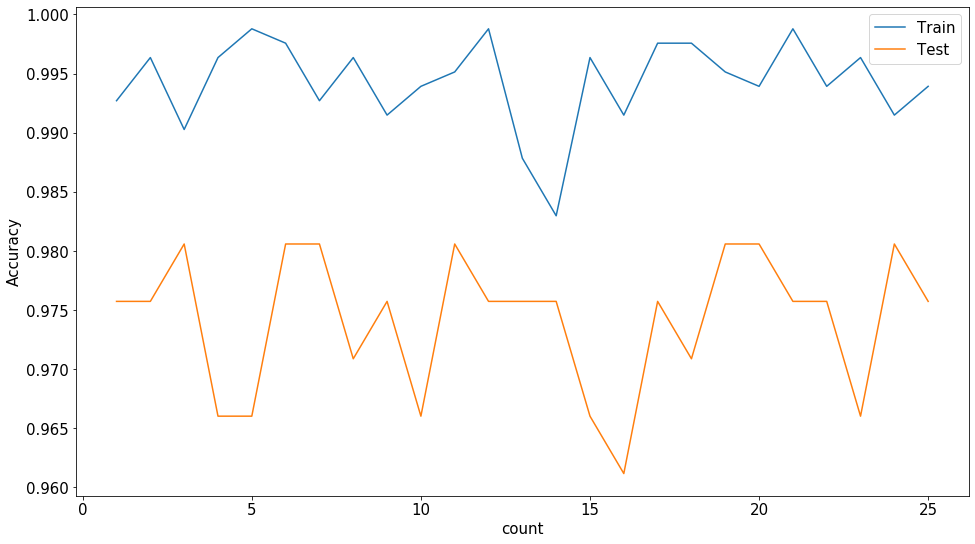

In [66]:
#인공신경망에서 최적의 은닉노드갯수를 결정하기 위한 실험
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,501,100): #첫번째 은닉층의 노드수 100~500
    for j in range(100,501,100): #두번째 은닉층의 노드수 100~500
        model=MLPClassifier(random_state=100,
                           hidden_layer_sizes=[i,j],max_iter=5000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))
        
plt.rcParams['font.size']=15
plt.plot(range(1,26),train_rate,label='Train')
plt.plot(range(1,26),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값
print('최적의 k:',idx+1)
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,501,100):
    for j in range(100,501,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

In [68]:
#최적의 은닉노드를 적용한 인공신경망 모형
mlp=MLPClassifier(max_iter=5000,hidden_layer_sizes=[100,300],
                 random_state=100)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 300], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [69]:
#예측정확도
score_tr=mlp.score(X_train_scaled,y_train)
score_te=mlp.score(X_test_scaled,y_test)
print('학습용:',score_tr)
print('검증용:',score_te)

학습용: 0.9902676399026764
검증용: 0.9805825242718447


In [70]:
#결과리스트에 저장
result_tr.append(score_tr)
result_te.append(score_te)
print(result_tr)
print(result_te)

[0.927007299270073, 1.0, 1.0, 0.9537712895377128, 0.9902676399026764]
[0.941747572815534, 1.0, 1.0, 0.9514563106796117, 0.9805825242718447]


In [15]:
#svm 모형의 최적의 C,gamma value를 찾는 과정
from sklearn.svm import SVC
train_rate=[]
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000]
g_values=[0.0001,0.001,0.01,0.1]
for n in c_values:
    for g in g_values:
        svm=SVC(C=n,gamma=g,random_state=10)
        svm.fit(X_train_scaled,y_train)
        train_rate.append([n,g,svm.score(X_train_scaled,y_train)])
        test_rate.append([n,g,svm.score(X_test_scaled,y_test)])
        
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2])
idx=np.where(test_arr[:,2]==max_rate)[0][0]
print('최적의 c:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최적의 정확도:',test_rate[idx][2])

plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='Test')
plt.ylabel('Accuracy')
plt.legend()

NameError: name 'X_train_scaled' is not defined

In [72]:
#최적의 c: 100, 최적의 gamma:0.1 로 만든 svm 모형
svm=SVC(C=100,gamma=0.1,random_state=10)
svm.fit(X_train_scaled,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [73]:
#예측정확도
score_tr=svm.score(X_train_scaled,y_train)
score_te=svm.score(X_test_scaled,y_test)
print('학습용:',score_tr)
print('검증용:',score_te)

학습용: 0.9793187347931873
검증용: 0.9757281553398058


In [74]:
#결과리스트에 저장
result_tr.append(score_tr)
result_te.append(score_te)
print(result_tr)
print(result_te)

[0.927007299270073, 1.0, 1.0, 0.9537712895377128, 0.9902676399026764, 0.9793187347931873]
[0.941747572815534, 1.0, 1.0, 0.9514563106796117, 0.9805825242718447, 0.9757281553398058]


No handles with labels found to put in legend.


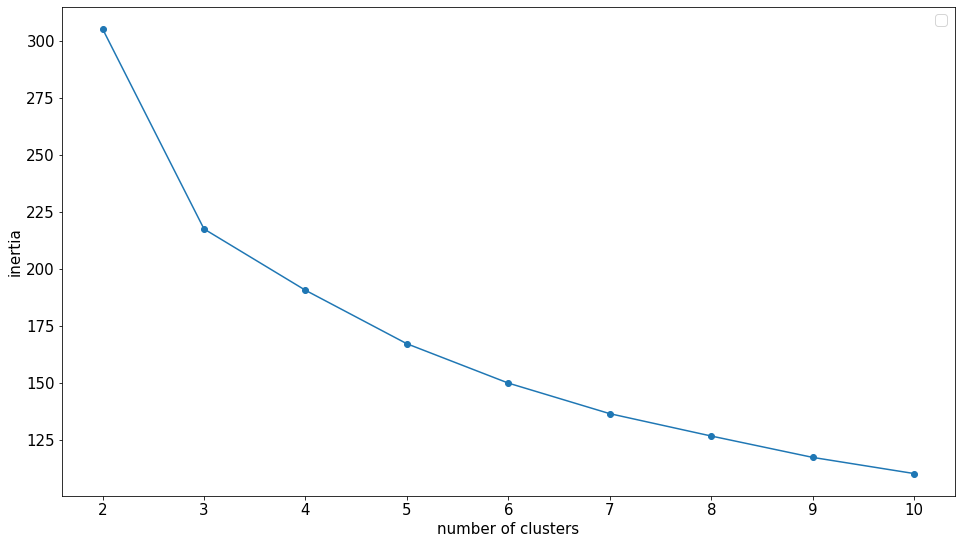

In [76]:
# KMeans 군집화를 위하여 최적의 중앙좌표 갯수를 구하는 코드
from sklearn.cluster import KMeans
clusters=range(2,11)
inertias=[]
for n in clusters:
    km=KMeans(n_clusters=n,random_state=10)
    km.fit(X_train_scaled)
    inertias.append(km.inertia_)
    
plt.rcParams['font.size']=15
plt.plot(clusters,inertias,'-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')
plt.legend()
#엘보우 포인트 확인: 

In [78]:
#군집갯수 3개인 KMeans 모형
km=KMeans(n_clusters=3, random_state=10)
km.fit(X_train_scaled)
pred_tr=km.predict(X_train_scaled)
pred_te=km.predict(X_test_scaled)

In [79]:
#실루엣포인트: 군집화 지수
from sklearn.metrics import silhouette_score
score_tr=silhouette_score(X_train_scaled,pred_tr)
score_tr=silhouette_score(X_test_scaled,pred_te)
print('학습용:',score_tr)
print('검증용:',score_te)


학습용: 0.3949080879999128
검증용: 0.9757281553398058


In [80]:
#결과리스트에 추가
result_tr.append(score_tr)
result_te.append(score_te)
print(result_tr)
print(result_te)

[0.927007299270073, 1.0, 1.0, 0.9537712895377128, 0.9902676399026764, 0.9793187347931873, 0.3949080879999128]
[0.941747572815534, 1.0, 1.0, 0.9514563106796117, 0.9805825242718447, 0.9757281553398058, 0.9757281553398058]


최적의 알고리즘(학습용): TREE
최적의 정확도(학습용): 1.0
최적의 알고리즘(검증용): TREE
최적의 정확도(검증용): 1.0


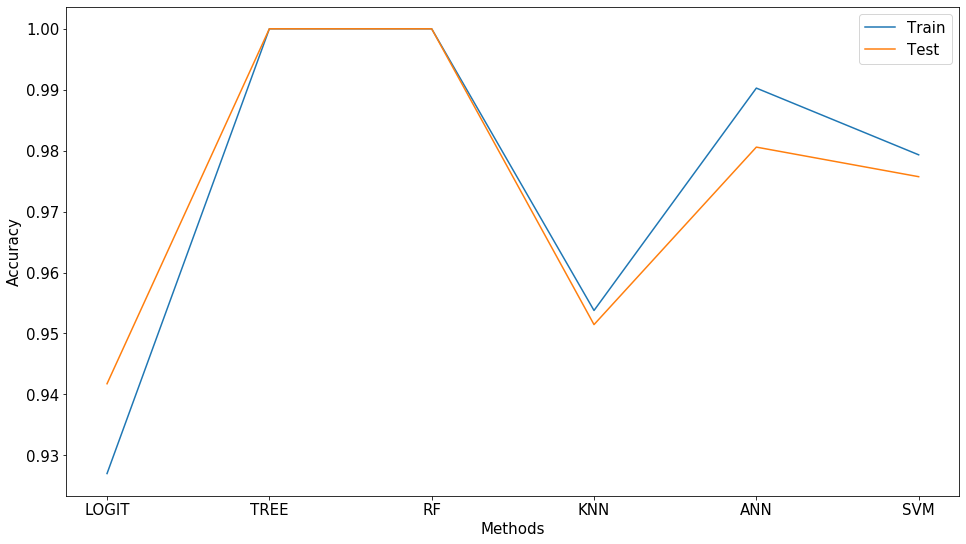

In [84]:
#알고리즘별 예측정확도 그래프
methods=['LOGIT','TREE','RF','KNN','ANN','SVM','KMeans']
#학습용 정확도
result_tr_arr=np.array(result_tr)
max_rate_tr=np.max(result_tr_arr)
idx_tr=np.where(result_tr_arr == max_rate_tr)[0][0]

result_te_arr=np.array(result_te)
max_rate_te=np.max(result_te_arr)
idx_te=np.where(result_te_arr == max_rate_te)[0][0]

print('최적의 알고리즘(학습용):',methods[idx_tr])
print('최적의 정확도(학습용):',max_rate_tr)
print('최적의 알고리즘(검증용):',methods[idx_te])
print('최적의 정확도(검증용):',max_rate_te)

plt.rcParams['font.size']=15
plt.plot(methods[:-1],result_tr_arr[:-1],label='Train')
plt.plot(methods[:-1],result_te_arr[:-1],label='Test')
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.legend()